# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

In [2]:
# WAV-файл хранит звуковой сигнал во временной области с определенным квантованием и частотой дискретизации.
# Дискретизации — это степень детализации времени отсчёт. Чем выше частота дискретизации, тем ниже степень дисперсии. Обычно частота дискретизации профессиональных аудиофайлов составляет 44100 Гц, что составляет 44100 выборок в секунду.
# Степень квантования — это степень детализации выборочного значения. Чем выше степень квантования, тем меньше вероятность искажения звука. Обычная степень квантования — это разрядность в 16 бит, что означает, что его можно разделить на 2^16 уровней.

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [3]:
import librosa
from IPython.display import Audio
# Load the WAV file
x, sr = librosa.load("aa.wav")

# Print the original sample rate
print(sr)

# Change the sample rate
new_sr = 800

# Resample the signal
x = librosa.resample(x, target_sr=new_sr, orig_sr=sr)

Audio(data= x, rate=new_sr)

# 800 
# Модифицированный файл невозможно воспроизвести в ipynb, я его закинул в файл "800.wav".

22050


### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

In [4]:
# Wav — это несжатый формат без потерь, а mp3 и ogg — форматы со сжатием с потерями. Файлы MP3 поддерживают только максимальную разрядность 16 бит. Степень сжатия ogg может варьироваться в зависимости от требований.

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [5]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [6]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

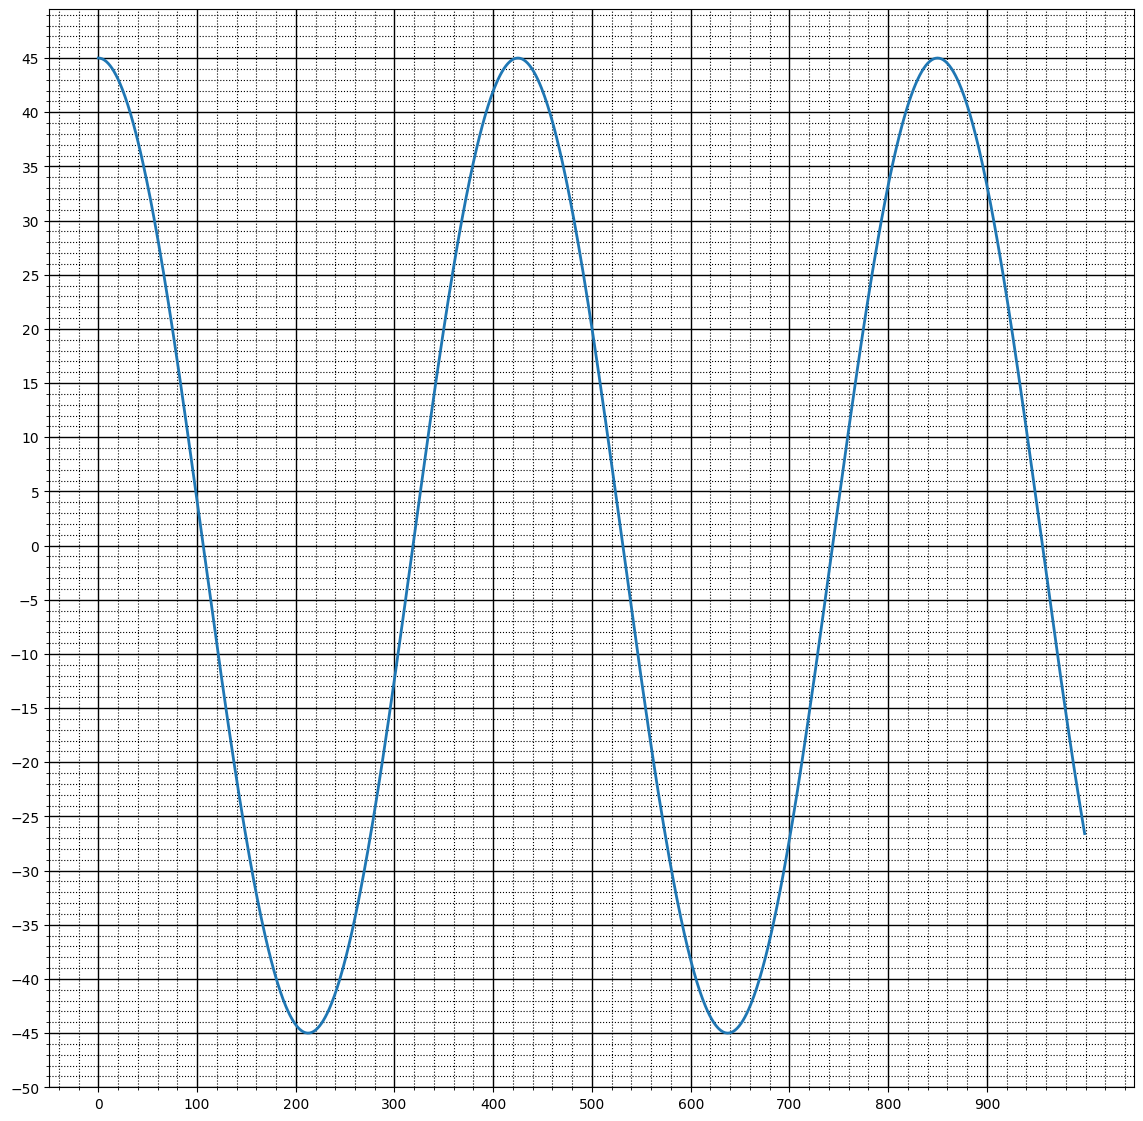

In [7]:
draw_signal(test_data['task2']['a'])

In [8]:
# YOUR CODE HERE
x = np.arange(0, 1000, 1)
a = 45*np.cos(2*np.pi/425*x)

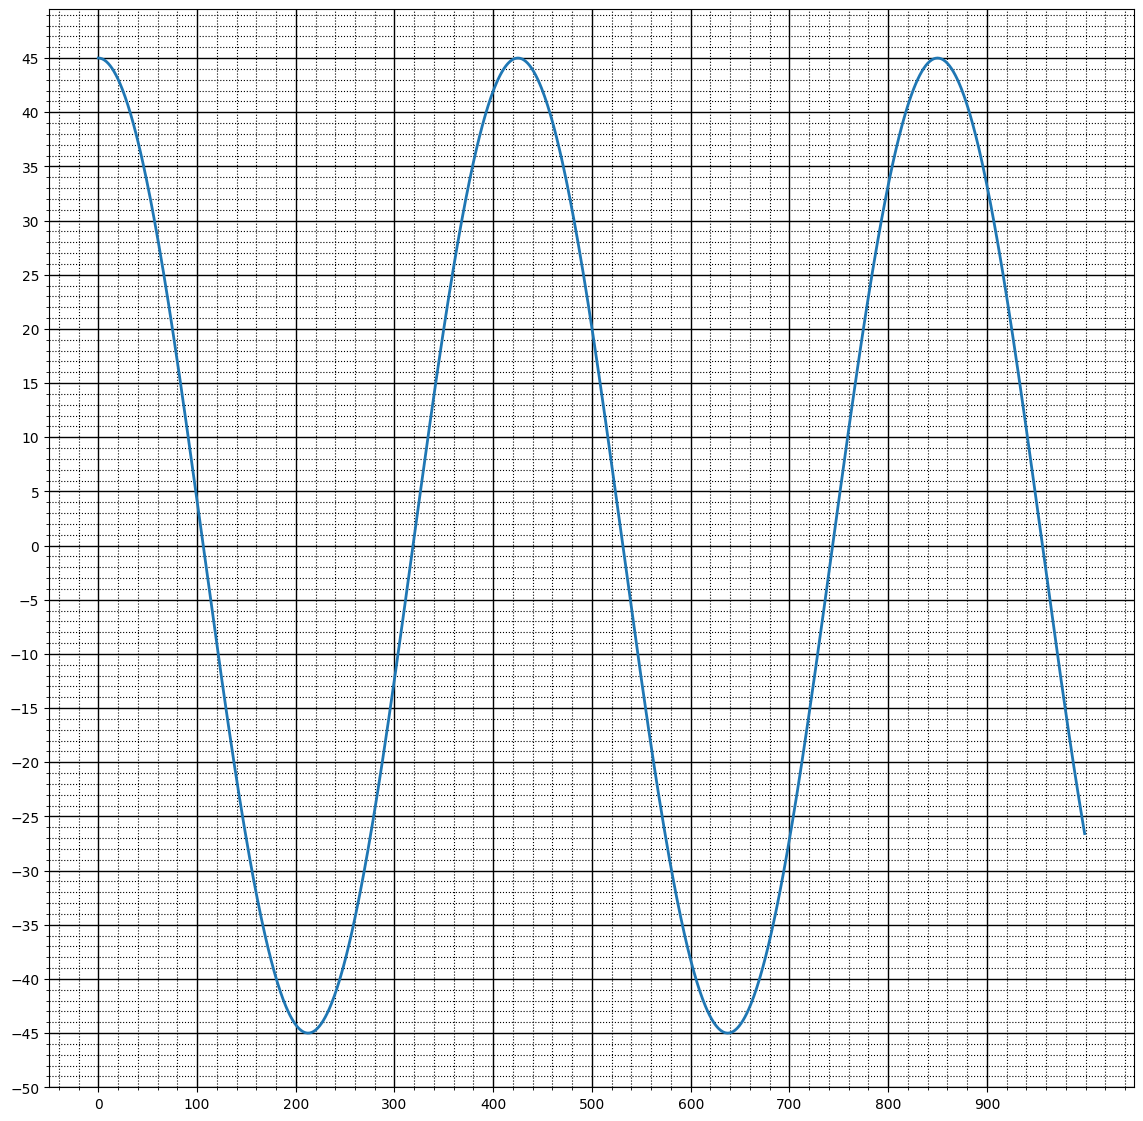

In [9]:
draw_signal(a)

In [10]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{425}$

3. Фаза - $\phi= 0$

### Сигнал ***b***

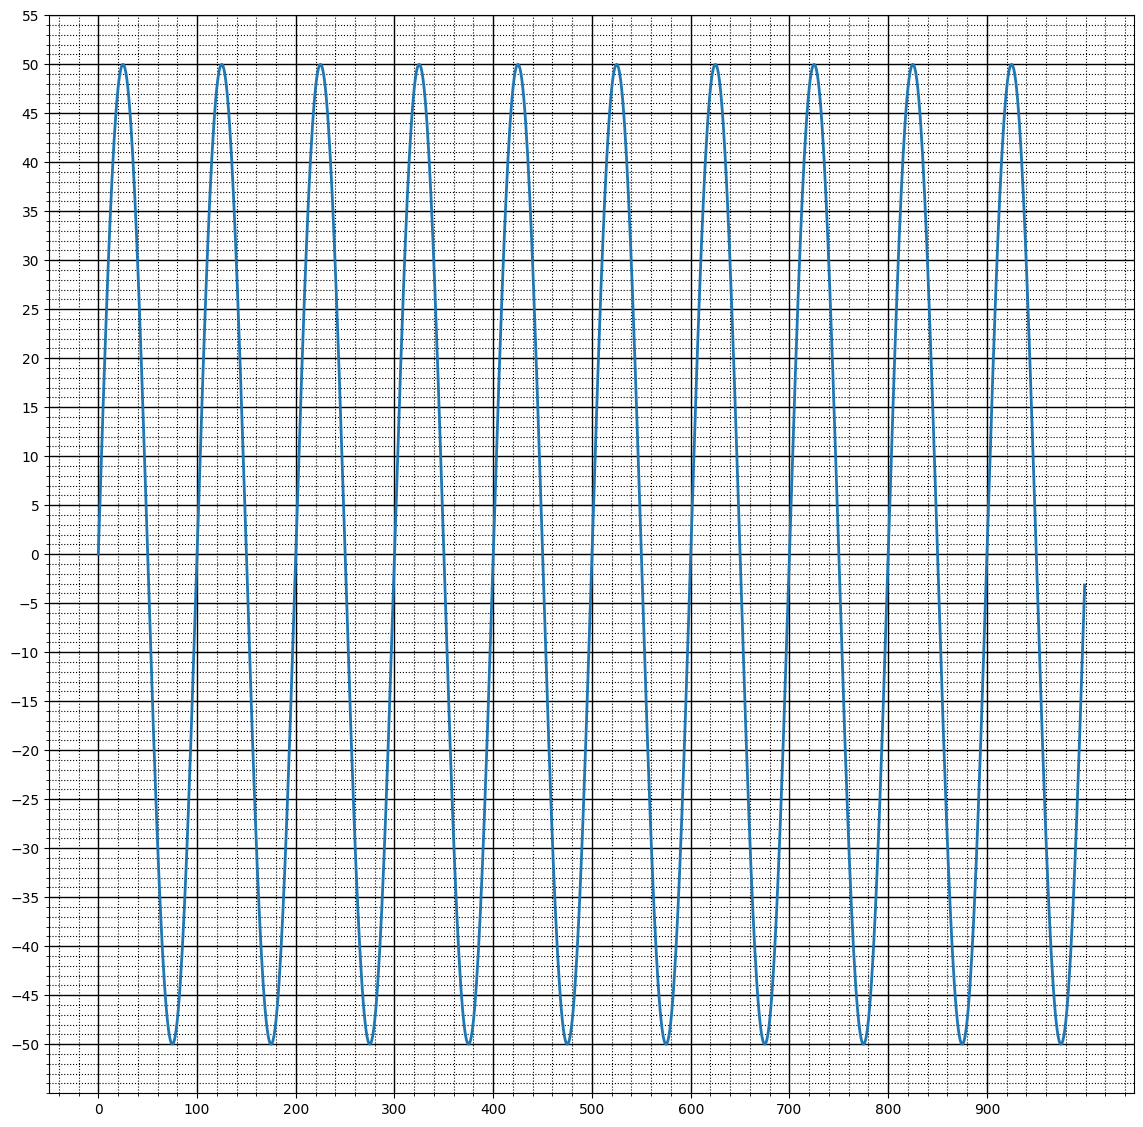

In [11]:
draw_signal(test_data['task2']['b'])

In [12]:
x = np.arange(0, 1000, 1)
b = 50*np.cos(2*np.pi/100*x - np.pi/2)

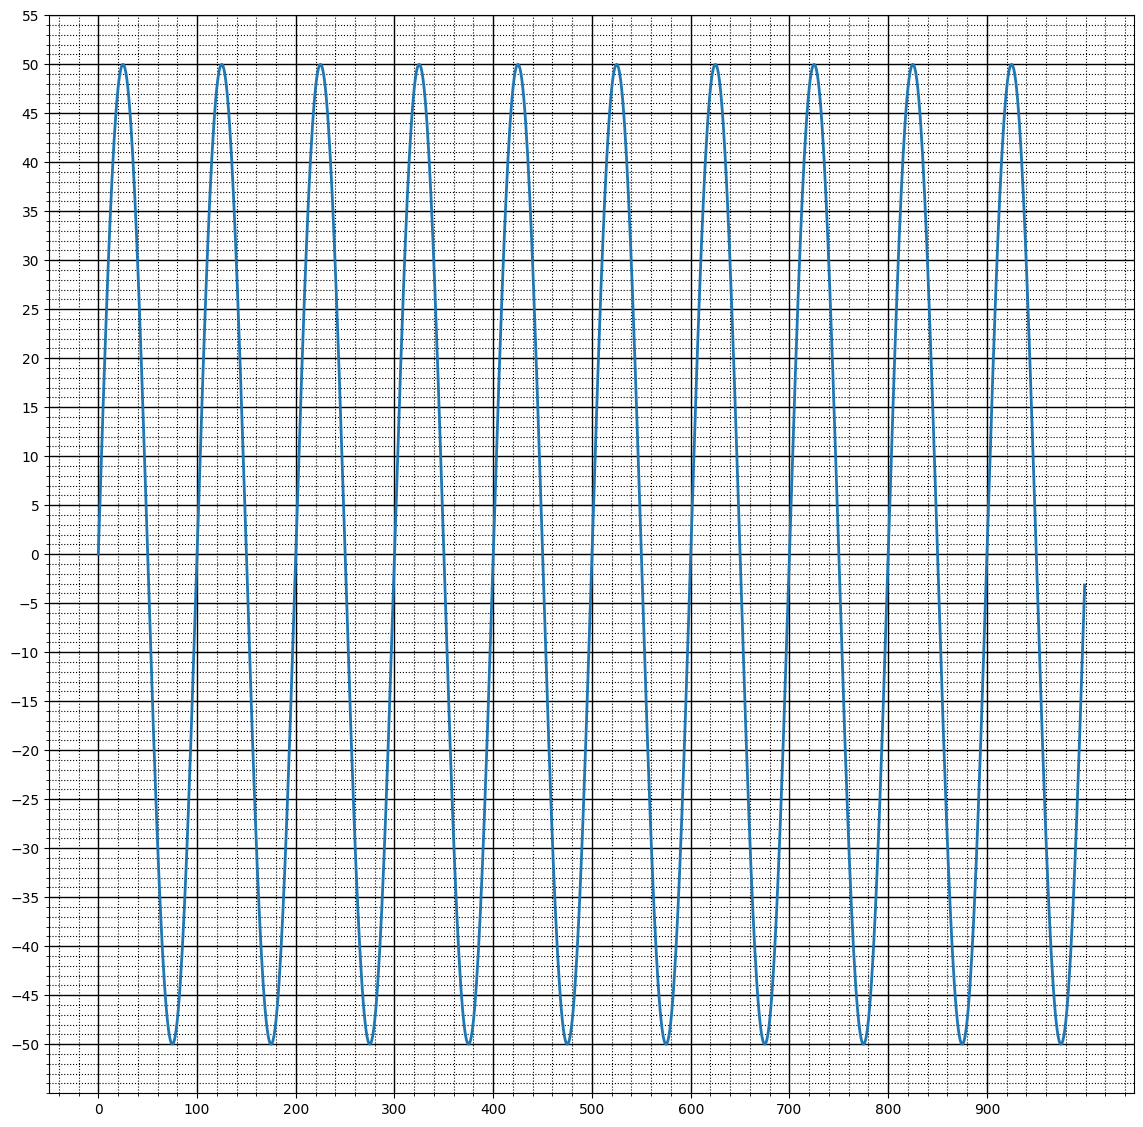

In [13]:
draw_signal(b)

In [14]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{100}$

3. Фаза - $\phi= -\frac{\pi}{2}$

### Сигнал ***c***

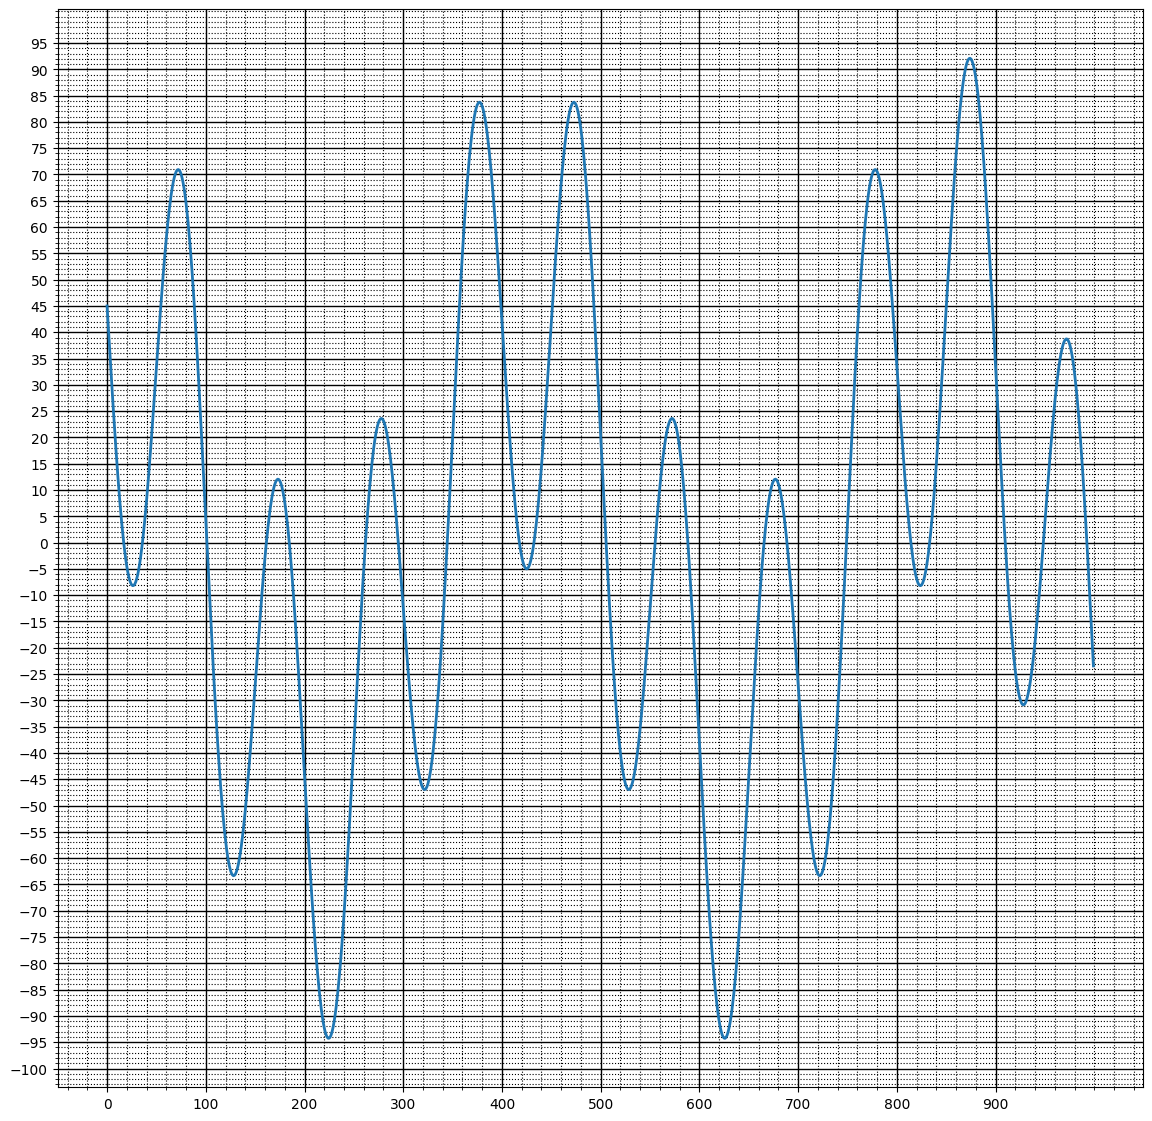

In [15]:
draw_signal(test_data['task2']['c'])

In [16]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
c = a-b

In [17]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [18]:
def convolve(in1, in2):
    #YOUR CODE HERE
    res = np.zeros((in1.size+in2.size-1,), dtype=float)
    for i in range(len(in1)):
        for j in range(len(in2)):
            res[i+j]+=in1[i]*in2[j]
    return res

In [19]:
import scipy.signal
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [49]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [50]:
test_convolve(a, b, print_debug=True)

Your result [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 3. 6. 8. 9. 9. 9. 9. 9. 9. 8. 6. 3.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Scipy result [0 0 0 0 0 0 0 0 0 0 0 1 3 6 8 9 9 9 9 9 9 8 6 3 1 0 0 0 0 0 0 0 0 0 0 0]
Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

In [61]:
x = np.arange(0, 1000, 1)
a = 45*np.cos(2*np.pi/425*x)

Сигнал **b**

In [60]:
x = np.arange(0, 1000, 1)
b = 50*np.cos(2*np.pi/100*x - np.pi/2)

Свертка **a** и **b**

In [67]:
conv_ab = convolve(a, b)

Все 3 графика на одной картинке:

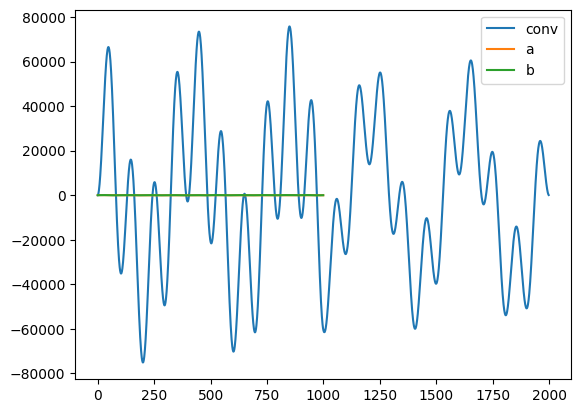

In [68]:
xpoints = np.array(range(0,len(conv_ab)))
ypoints = conv_ab
plt.plot(xpoints, ypoints, label = "conv")
plt.plot(range(len(a)), a, label = "a")
plt.plot(range(len(b)), b, label = "b")
plt.legend()
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [190]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE
    alpha = 0.5
    y = np.zeros(N)
    L = len(noise)
    for n in range(N):
        y[n] = (noise[n] if n<L else 0) + (y[n-L]*alpha if n>=L else 0) + (y[n-L-1]*alpha if n>=L+1 else 0)
    return y

    raise NotImplementedError()

In [181]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [211]:
frequencies = {'1': 523, '1#': 554, '2': 587, '2#': 622, '3': 659, '4': 698, '4#': 740, '5': 784, '5#': 831, '6': 880, '6#': 932, '7': 988}
def make_note(frequency, sample_rate, duration):
    sample_rate = sample_rate 
    sec = duration
    gen_len = int(sample_rate * sec)
    noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency)))
    return karplus_strong(noise, gen_len)

compose = [('5', 1),('2#', 2/3),('2',1/3),('1',4/3),('1',1/3),('2',1/3),('2#',1/3),('1',1/3),('2#',1/3),('5',2/3),('5#',1/3),('5',1),('4',1)]
music = np.array([], dtype=float)
for ele in compose:
    music = np.append(music, make_note(frequencies[ele[0]], 44100, ele[1]))


Audio(data= music, rate=sample_rate)# Shostakovich Waltz No. 2

Визуализируем затухание амплитуды:

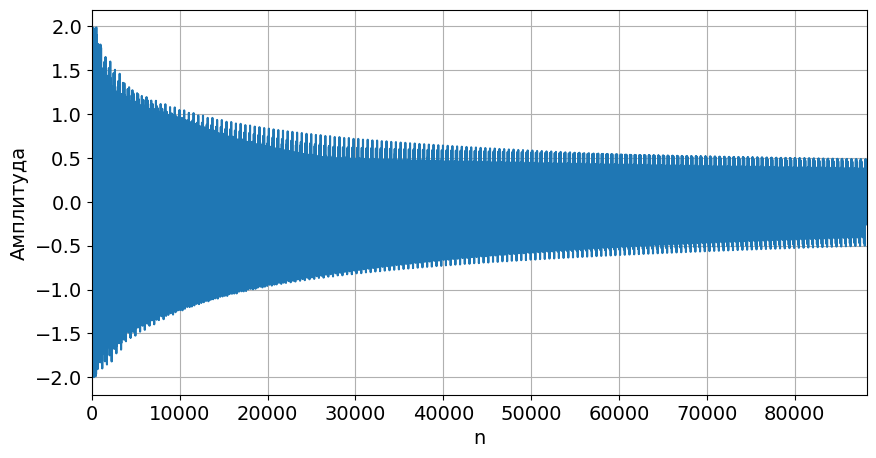

In [179]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

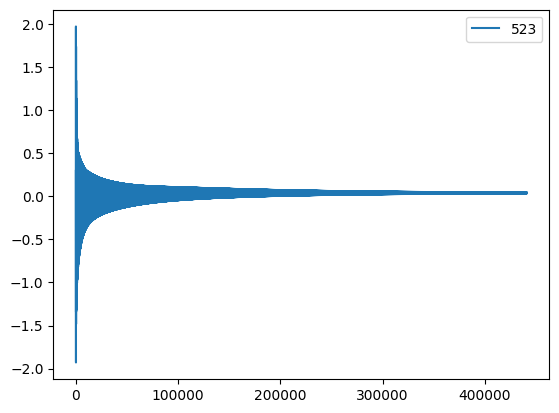

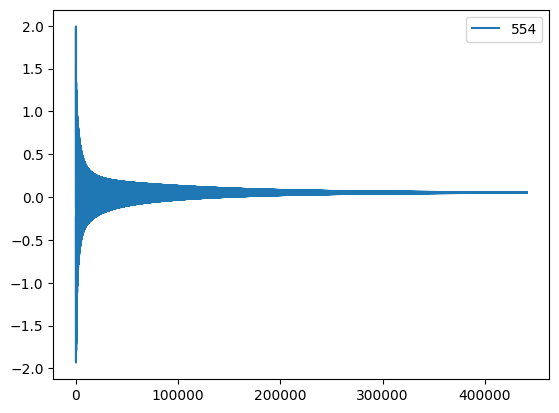

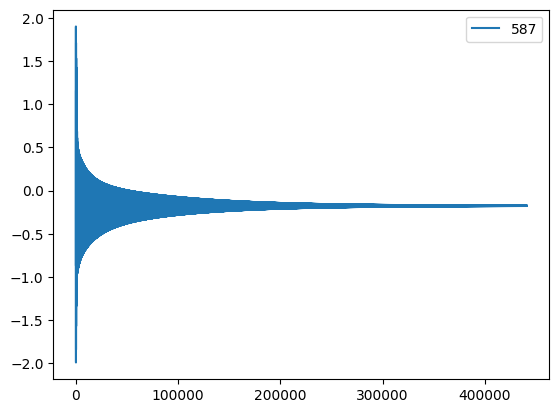

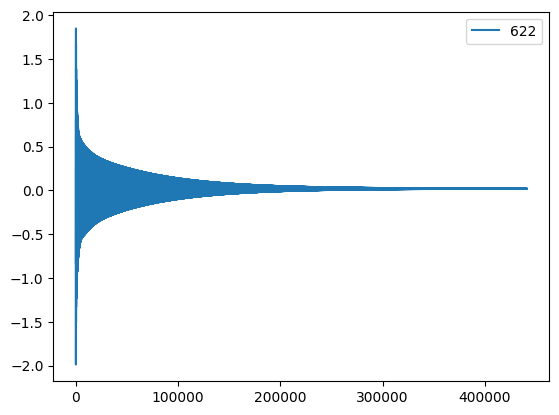

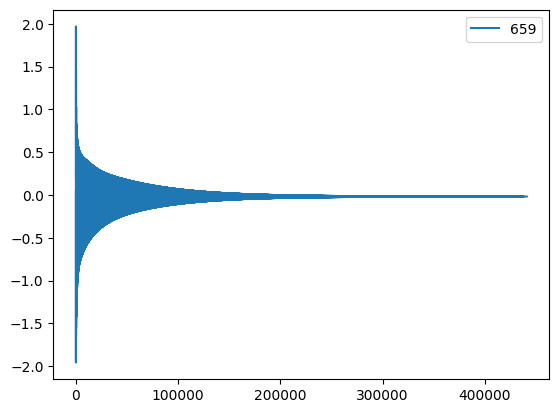

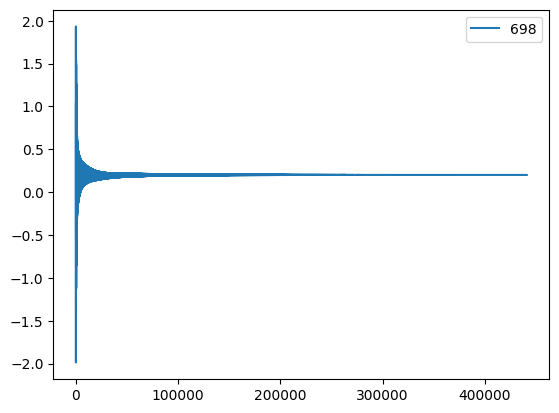

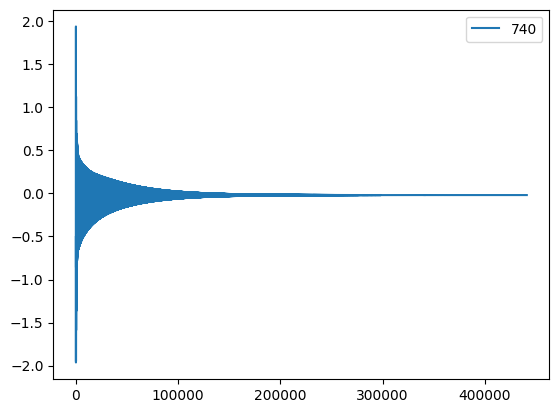

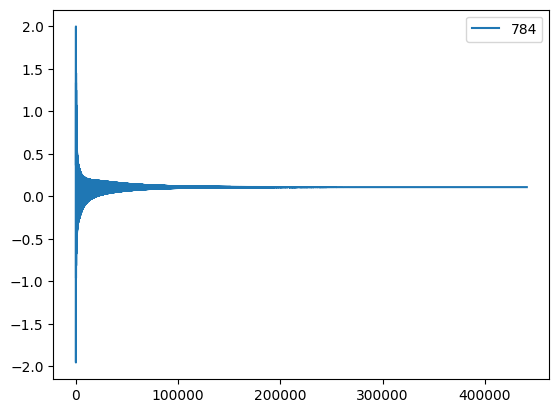

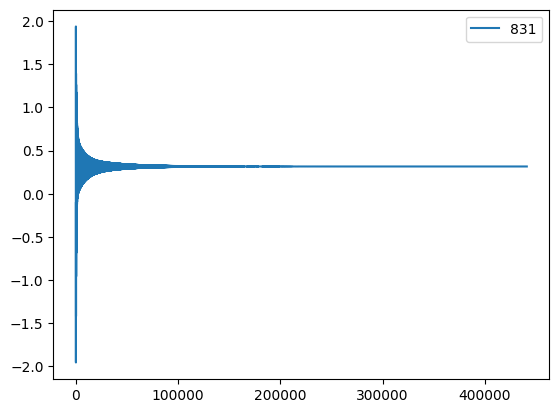

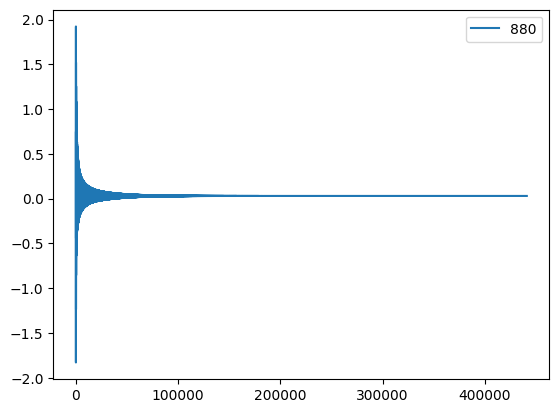

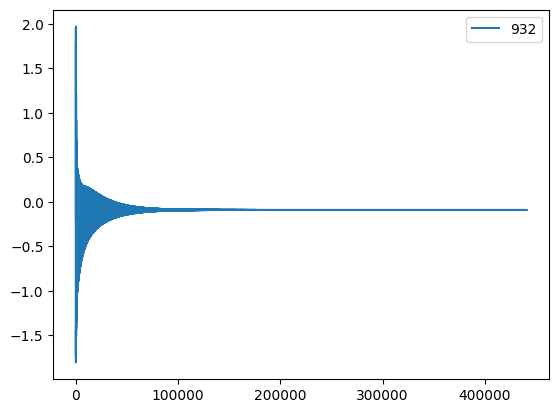

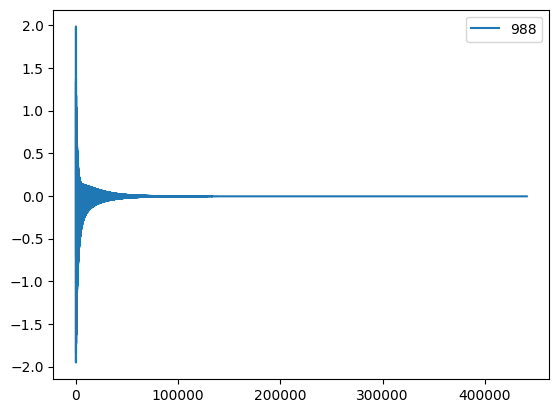

In [225]:
freq = list(frequencies.values())
freq.sort()
for ele in freq:
    note = make_note(ele, 44100, 10)
    plt.plot(np.array(range(len(note))), note, label = str(ele))
    plt.legend()
    plt.show()